<a href="https://colab.research.google.com/github/Drkaunas/data/blob/main/M1_direct_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objectives
  - Familiarize yourself with the following terms and their relevance to linear algebra: singular, inverse, identity matrix, determinant, rank, augmented matrix, pivoting and condition number.
  - Express a set of linear equations in the form Ax=b and indicate if has no solution, one solution, or an infinite number of solutions. Be able to explain why your answer was chosen based on characteristics of the matrix and/or augmented matrix.
  - Solve a given set of 3 equations using Gauss elimination and LU decomposition.
  - Know under what conditions a particular method may not achieve a solution.

## Basics of Linear Algebra

Before we introduce the systems of linear equations, let's first introduce some basics of linear algebra, which will be used to describe and solve the linear equations. We will just cover the very basics of it in this chapter, and you can explore more by reading a linear algebra book.

A **square matrix** is an ${n} \times {n}$ matrix; that is, it has the same number of rows as columns. The **determinant** is an important property of square matrices. The determinant is denoted by $det(M)$, both in mathematics and in Numpy's `linalg` package, sometimes it is also denoted as $|M|$. Some examples in the uses of a determinant will be described later.

In the case of a $2 \times 2$ matrix, the determinant is:

$$
|M| = \begin{bmatrix}
a & b \\
c & d\\
\end{bmatrix} = ad - bc$$

Similarly, in the case of a $3 \times 3$ matrix, the determinant is:

$$
\begin{eqnarray*}
|M| = \begin{bmatrix}
a & b & c \\
d & e & f \\
g & h & i \\
\end{bmatrix} & = & a\begin{bmatrix}
\Box &\Box  &\Box  \\
\Box & e & f \\
\Box & h & i \\
\end{bmatrix} - b\begin{bmatrix}
\Box &\Box  &\Box  \\
d & \Box & f \\
g & \Box & i \\
\end{bmatrix}+c\begin{bmatrix}
\Box &\Box  &\Box  \\
d & e & \Box \\
g & h & \Box \\
\end{bmatrix} \\
&&\\
& = & a\begin{bmatrix}
e & f \\
h & i \\
\end{bmatrix} - b\begin{bmatrix}
d & f \\
g & i \\
\end{bmatrix}+c\begin{bmatrix}
d & e \\
g & h \\
\end{bmatrix} \\
&&\\
& = & aei + bfg + cdh - ceg - bdi - afh
\end{eqnarray*}$$

We can use similar approach to calculate the determinant for higher the dimension of the matrix, but it is much easier to calculate using Python. We will see an example below how to calculate the determinant in Python.  

The **identity matrix** is a square matrix with ones on the diagonal and zeros elsewhere. The identity matrix is usually denoted by $I$, and is analagous to the real number identity, 1. That is, multiplying any matrix by $I$ (of compatible size) will produce the same matrix.

**TRY IT!** Use Python to find the determinant of the matrix $M = [[0, 2, 1, 3], [3, 2, 8, 1], [1, 0, 0, 3], [0, 3, 2, 1]]$. Use the *np.eye* function to produce a ${4} \times {4}$ identity matrix, $I$. Multiply $M$ by $I$ to show that the result is $M$.

In [ ]:
import numpy as np
from numpy.linalg import det

M = np.array([[0,2,1,3],
             [3,2,8,1],
             [1,0,0,3],
             [0,3,2,1]])

print('M:\n', M)

print('Determinant: %.1f'%det(M))
I = np.eye(4)
print('I:\n', I)
print('M*I:\n', np.dot(M, I))

M:
 [[0 2 1 3]
 [3 2 8 1]
 [1 0 0 3]
 [0 3 2 1]]
Determinant: -38.0
I:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
M*I:
 [[0. 2. 1. 3.]
 [3. 2. 8. 1.]
 [1. 0. 0. 3.]
 [0. 3. 2. 1.]]


The **inverse** of a square matrix $M$ is a matrix of the same size, $N=M^{-1}$, such that $M \cdot N = I$. The inverse of a matrix is analagous to the inverse of real numbers. For example, the inverse of 3 is $\frac{1}{3}$ because $(3)(\frac{1}{3}) = 1$. A matrix is said to be **invertible** if it has an inverse. The inverse of a matrix is unique; that is, for an invertible matrix, there is only one inverse for that matrix. If $M$ is a square matrix, its inverse is denoted by $M^{-1}$ in mathematics, and it can be computed in Python using the function `inv` from Numpy's `linalg` package.

For a $2 \times 2$ matrix, the analytic solution of the matrix inverse is:

$$
M^{-1} = \begin{bmatrix}
a & b \\
c & d\\
\end{bmatrix}^{-1} = \frac{1}{|M|}\begin{bmatrix}
d & -b \\
-c & a\\
\end{bmatrix}$$

The calculation of the matrix inverse for the analytic solution becomes complicated with increasing matrix dimension, there are many other methods can make things easier, such as Gaussian elimination, Newton's method, Eigendecomposition and so on. We will introduce some of these methods after we learn how to solve a system of linear equations, because the process is essentially the same.

Recall that 0 has no inverse for multiplication in the real-numbers setting. Similarly, there are matrices that do not have inverses. These matrices are called **singular**. Matrices that do have an inverse are called **nonsingular**.

One way to determine if a matrix is singular is by computing its determinant. If the determinant is 0, then the matrix is singular; if not, the matrix is nonsingular.

**TRY IT!** The matrix $M$ (in the previous example) has a nonzero determinant. The following code computes the inverse of $M$.

Modify the code to show that the matrix $P = [[0, 1, 0], [0, 0, 0], [1, 0, 1]]$ has a determinant value of 0 and therefore has no inverse.

In [ ]:
from numpy.linalg import inv

print('Inv M:\n', inv(M))

Inv M:
 [[-1.57894737 -0.07894737  1.23684211  1.10526316]
 [-0.63157895 -0.13157895  0.39473684  0.84210526]
 [ 0.68421053  0.18421053 -0.55263158 -0.57894737]
 [ 0.52631579  0.02631579 -0.07894737 -0.36842105]]


# Solutions to Systems of Linear Equations

In this module, we examine linear systems of equations and different methods for determining their solutions.  We also introduce the machinery of matrix algebra which will be necessary in later chapters, and close with some applications.

A **linear system** of $m$ equations with $n$ unknowns $x_1$, $x_2$, $x_3$, ... $x_n$, is a collection of equations that can be written in the following form.

$$
\begin{eqnarray*}
a_{11}x_1 + a_{12}x_2 + \hspace{0.5cm} ... \hspace{0.5cm} + a_{1n}x_n & = & y_1 \\
a_{21}x_1 + a_{22}x_2 + \hspace{0.5cm} ... \hspace{0.5cm} + a_{2n}x_n & = & y_2 \\
\vdots \hspace{1.2cm} \vdots \hspace{3cm} \vdots \hspace{0.5cm}  & = & \vdots \\
a_{m1}x_1 + a_{m2}x_2 + \hspace{0.5cm} ... \hspace{0.5cm} +  a_{mn}x_n & = & y_m \\
\end{eqnarray*}
$$
or
$$A_{ij}x_j=y_j$$

or
$$\begin{bmatrix}
a_{11} & a_{12} & ... & a_{1n}\\
a_{21} & a_{22} & ... & a_{2n}\\
... & ... & ... & ... \\
a_{m1} & a_{m2} & ... & a_{mn}
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\ ... \\x_n \end{array}\right] =
\left[\begin{array}{c} y_1 \\y_2 \\ ... \\y_m \end{array}\right]$$

This is a system of linear equations that can be expressed in matrix form, $Ax=y$, where $A$ is an $m \times n$ matrix. This means there are $m$ equations and $n$ unknowns in our system. A **solution** to a system of linear equations is an $x$ in ${\mathbb{R}}^n$ that satisfies the matrix form equation. Depending on the values that populate $A$ and $y$, there are three distinct solution possibilities for $x$. Either there is no solution for $x$, or there is one, unique solution for $x$, or there are an infinite number of solutions for $x$.

A particularly useful representation of the equations for computational purposes
is the augmented coefficient matrix obtained by adjoining the constant vector y to the coefficient matrix A in the following fashion:

$$A|y=\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} & y_1\\
a_{21} & a_{22} & \cdots & a_{2n} & y_2\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
a_{m1} & a_{m2} & ... & a_{mn}  & y_m
\end{bmatrix}$$

Linear systems with two equations and two unknowns are a great starting point since we easily graph the sets of points that satisfy each equation in the $x_1x_2$ coordinate plane.  The set of points that satisfy a single linear equation in two variables forms a line in the plane.  Three examples will be sufficient to show the possible solution sets for linear systems in this setting.  



### Example 1:  System with no solutions

$$
\begin{eqnarray*}
x_1 + 3x_2 & = & 5 \\
x_1 + 3x_2 & = & 0 \\
\end{eqnarray*}
$$

In this example the solution sets of the individual equations represent lines that are parallel.  There is no pair of values that satisfy both equations simultaneously.

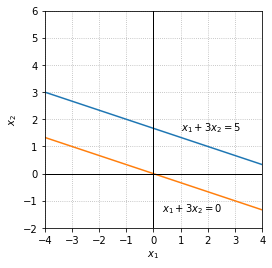

In [ ]:
# this is used so that the plt.show() function is not necessary
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-5,5,100)
fig, ax = plt.subplots()
ax.plot(x,(5-x)/3)
ax.plot(x,-x/3)

ax.text(1,1.6,'$x_1+3x_2 = 5$')
ax.text(0.3,-1.4,'$x_1+3x_2 = 0$')

ax.set_xlim(-4,4)
ax.set_ylim(-2,6)
ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)
ax.set(xlabel='$x_1$', ylabel='$x_2$')

## This options specifies the ticks based the list of numbers provided.
ax.set_xticks(list(range(-4,5)))
ax.set_aspect('equal')
ax.grid(True,ls=':')

### Example 2:  System with a unique solution

$$
\begin{eqnarray*}
x_1 + 3x_2 & = & 5 \\
x_1 - 2x_2 & = & -5 \\
\end{eqnarray*}
$$

The solution set for each equation can be represented by a line, and the solution set for the linear system is represented by all points that lie on both lines.  In this case the lines intersect at a single point and there is only one pair of values that satisfy both equations, $x_1 = -1$, $x_2 = 2$.

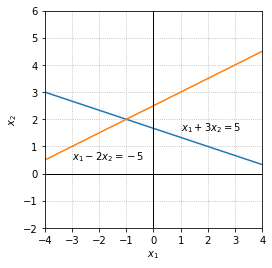

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,(5-x)/3)
ax.plot(x,(5+x)/2)

ax.text(1,1.6,'$x_1+3x_2 = 5$')
ax.text(-3,0.5,'$x_1-2x_2 = -5$')

ax.set_xlim(-4,4)
ax.set_ylim(-2,6)
ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)
ax.set(xlabel='$x_1$', ylabel='$x_2$')


## This options specifies the ticks based the list of numbers provided.
ax.set_xticks(list(range(-4,5)))
ax.set_aspect('equal')
ax.grid(True,ls=':')

### Example 3:  System with an infinite number of solutions

$$
\begin{eqnarray*}
x_1 + 3x_2 & = & 5 \\
2x_1 + 6x_2 & = & 10 \\
\end{eqnarray*}
$$

In the final example, the second equation is a multiple of the first equation.  The solution set for both equations is represented by the same line and thus every point on the line is a solution to the linear system.

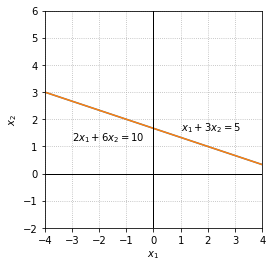

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,(5-x)/3)
ax.plot(x,(5-x)/3)

ax.text(1,1.6,'$x_1+3x_2 = 5$')
ax.text(-3,1.2,'$2x_1+6x_2 = 10$')

ax.set_xlim(-4,4)
ax.set_ylim(-2,6)
ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)
ax.set(xlabel='$x_1$', ylabel='$x_2$')


ax.set_xticks(list(range(-4,5)))
ax.set_aspect('equal')
ax.grid(True,ls=':')

## Useful Python functions (*det*, *concatenate* and *rank*)

The *numpy* function *concatenate* adds row (axis = 0) or columns (axis = 1) to a matrix. Thus, to create the augmented matrix $A|y$, we use **np.concatenate((a, y.T), axis=1)**.

In [ ]:
a = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6]])
print("concatenate a row")
print(np.concatenate((a, y), axis=0))
print("concatenate a column to get the augmented matrix")
print(np.concatenate((a, y.T), axis=1))

concatenate a row
[[1 2]
 [3 4]
 [5 6]]
concatenate a column to get the augmented matrix
[[1 2 5]
 [3 4 6]]


As noted above, the **determinant** of a matrix is non-zero when the coefficient matrix is *nonsingular*, that is $|A| \ne 0$. The rows and columns of a nonsingular matrix are *linearly independent* in the sense that no row (or column) is a linear combination of other rows (or columns).

The matrix is still problematic if it is "nearly singular", i.e. $|A|$ is small relative to a reference value. We can say that the determinant is small when   $|A| << ||A||$, where $||A||$ is the norm of the matrix. There are several definitions for the norm, which we will not cover. Related to this is the **condition number**. The condition number of $A$ is defined as the norm of $A$ times the norm of the inverse of $A$. In Python, we can calculate the condition number using the *cond* function in *numpy.linalg*. A problem with a low condition number is said to be *well-conditioned*, while a problem with a high condition number is said to be *ill-conditioned*. In non-mathematical terms, an ill-conditioned problem is one where, for a small change in the inputs (the independent variables) there is a large change in the answer or dependent variable. This means that the correct solution/answer to the equation becomes hard to find. The condition number is a property of the problem.

The **rank** of a matrix is the maximum number of its linearly independent column vectors (or row vectors). The ranks of $A$ and $A|y$ are useful in determining the condition of the system of equations. In Python, we can calculate this with the *rank* function in *numpy.linalg*.  

In [ ]:
from numpy.linalg import matrix_rank, cond

I=np.eye(3)
print(I)
print("The determinant is ", np.linalg.det(I))
print("The condition number of this matrix is ", cond(I))
print("The rank of this matrix is ",matrix_rank(I))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
The determinant is  1.0
The condition number of this matrix is  1.0
The rank of this matrix is  3


In [ ]:
I[-1,-1] = 0 # insert a 0 in the bottom right position of the matrix I
I[-1,-2] = 2 # insert a 1 in the bottom center position of the matrix I
print(I)
print("The determinant is ", np.linalg.det(I))
print("The condition number of this matrix is ", cond(I))
print("The rank of this matrix is ",matrix_rank(I))


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 2. 0.]]
The determinant is  0.0
The condition number of this matrix is  inf
The rank of this matrix is  2


The following code uses rank($A$), rank($A|y$) and $n$ for a system of equations $Ax=y$ to determine the number of solutions.

In [ ]:
import numpy as np
from numpy.linalg import det, cond, matrix_rank, solve

a = np.array([[1, 3], [-2, -6]])
y = np.array([[5, 10]])

n=y.size # number of components in the matrix
rankA=matrix_rank(a)
rankAy=matrix_rank(np.concatenate((a, y.T), axis=1))
print("rank[A] = ",rankA)
print("rank[A|y] = ",rankAy)
print("n = ",n)
print("The determinant is ", np.linalg.det(a))
print("The condition number is ",np.linalg.cond(a))

#a = np.array([[1, 2], [3, 5]])
#b = np.array([1, 2])

if rankAy==(rankA+1):
    print("rank(A) + 1 = rank(A|y), so there is no solution for x")
elif n>rankA:
    print("rank(A) is less than n and equals rank[A|y], so there are an infinite number of solutions for x")
else:
    print("rank[A] = rank[A|y] = n, so there is a unique solutions for x: ", np.linalg.solve(a, y.T)
)


rank[A] =  1
rank[A|y] =  2
n =  2
The determinant is  0.0
The condition number is  1.2587943637803934e+16
rank(A) + 1 = rank(A|y), so there is no solution for x


**Case 1: There is no solution for $x$.** If ${rank}([A,y]) = {rank}(A) + 1$, then $y$ is
linearly independent from the columns of $A$. Therefore $y$ is not in the range of $A$ and by definition, there cannot be an $x$ that satisfies the equation. Thus, comparing rank($[A,y]$) and rank($A$) provides an easy way to check if there are no solutions to a system of linear equations.

**Case 2:** If ${rank}([A,y]) = {rank}(A)$, then $y$ can be written as a linear combination of the columns of $A$ and there is at least one solution for the matrix equation. For there to be only one solution, ${rank}(A) = n$ must also be true. In other words, the number of equations must be exactly equal to the number of unknowns.To see why this property results in a unique solution, consider the following three relationships between $m$ and $n: m < n, m = n$, and $m > n$.

* For the case where $m < n$, ${rank}(A) = n$ cannot possibly be true because this means we have a "fat" matrix with fewer equations than unknowns. Thus, we do not need to consider this subcase.
* When $m = n$ and ${rank}(A) = n$, then $A$ is square and invertible. Since the inverse of a matrix is unique, then the matrix equation $Ax = y$ can be solved by multiplying each side of the equation, on the left, by $A^{-1}$. This results in $A^{-1}Ax = A^{-1}y\rightarrow Ix = A^{-1}y\rightarrow x = A^{-1}y$, which gives the unique solution to the equation.
* If $m > n$, then there are more equations than unknowns. However if ${rank}(A) = n$, then it is possible to choose $n$ equations (i.e., rows of A) such that if these equations are satisfied, then the remaining $m - n$ equations will be also satisfied. In other words, they are redundant. If the $m-n$ redundant equations are removed from the system, then the resulting system has an $A$ matrix that is $n \times n$, and invertible. The new system then has a unique solution, which is valid for the whole system.

**Case 3: There is an infinite number of solutions for $x$.** If ${rank}([A, y]) = {rank}(A)$, then $y$ is in the range of $A$, and there is at least one solution for the matrix equation. However, if rank($A$) $<$ $n$, then there is an infinite number of solutions. The reason for this fact is as follows: although it is not shown here, if rank($A$) $<$ $n$, then there is at least one nonzero vector, $n$, that is in the null space of $A$ (Actually there are an infinite number of null space vectors under these conditions.). If $n$ is in the nullspace of $A$, then $An = 0$ by definition. Now let $x^{{\ast}}$ be a solution to the matrix equation $Ax = y$; then necessarily, $Ax^{{\ast}} = y$. However, $Ax^{{\ast}} + An = y$ or $A(x^{{\ast}} + n) = y$. Therefore, $x^{{\ast}} + n$ is also a
solution for $Ax = y$. In fact, since $A$ is a linear transformation, $x^{{\ast}} + \alpha n$ is a solution for any real number, $\alpha$ (you should try to show this on your own). Since there are an infinite number of acceptable values for $\alpha$, there are an infinite number of solutions for the matrix equation.

In the rest of the chapter, we will only discuss how we solve a systems of equations when it has unique solution. We will discuss some of the common methods that you often come across in your work in this section. And in the next section, we will show you how to solve it in Python.

Let's say we have n equations with n variables, $Ax=y$, as shown in the following:

$$\begin{bmatrix}
a_{11} & a_{12} & ... & a_{1n}\\
a_{21} & a_{22} & ... & a_{2n}\\
... & ... & ... & ... \\
a_{n1} & a_{n2} & ... & a_{nn}
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\ ... \\x_n \end{array}\right] =
\left[\begin{array}{c} y_1 \\y_2 \\ ... \\y_n \end{array}\right]$$

**TRY IT!** Let's investigate a system of linear equations involving

$$4.1x_1+ 2.8x_2 = 4.1 \\
9.7x_1+6.6x_2 = 9.7$$

and

$$4.1x_1+ 2.8x_2 = 4.11 \\
9.7x_1+6.6x_2 = 9.7$$


## 1. Gauss Elimination Method

The **Gauss Elimination** method is a procedure to turn matrix $A$ into an **upper triangular** form to solve the system of equations. Let's use a system of 4 equations and 4 variables to illustrate the idea. The Gauss Elimination essentially coverts the system of equations to:

$$\begin{bmatrix}
a_{11} & a_{12} & a_{13} & a_{14}\\
0 & a_{22}' & a_{23}' & a_{24}'\\
0 & 0 & a_{33}' & a_{34}' \\
0 & 0 & 0 & a_{44}'
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\ x_3 \\x_4 \end{array}\right] =
\left[\begin{array}{c} y_1 \\y_2' \\ y_3' \\y_4' \end{array}\right]$$

By converting the matrix form into this, we can see the equations become:

\begin{eqnarray*}
\begin{array}{}
 a_{11} x_1 &+& a_{12} x_2 & + & a_{13} x_{3} &+&a_{14} x_4 &=& y_1,\\
& & a_{22}' x_{2} &+ & a_{23}' x_{3} &+& a_{24}' x_4 &=& y_{2}' \\
&& & & a_{33}' x_{3} &+& a_{34}' x_4 &=& y_{3}',\\
&& && && a_{44}' x_4 &=& y_{4}'.
\end{array}
\end{eqnarray*}

We can see by turning into this form, $x_4$ can be easily solved by dividing both sides $a_{44}'$, then we can back substitute it into the 3rd equation to solve $x_3$. With $x_3$ and $x_4$, we can substitute them to the 2nd equation to solve $x_2$. Finally, we can get all the solution for $x$. We solve the system of equations from bottom-up, this is called **backward substitution** (Steps 6-8 below). Note that, if $A$ is a lower triangular matrix, we would solve the system from top-down by **forward substitution** (Steps 1-5 below).

Let's work on an example to illustrate how we solve the equations using Gauss Elimination.

**TRY IT!** Use Gauss Elimination to solve the following equations.

\begin{eqnarray*}
4x_1 + 3x_2 - 5x_3 &=& 2 \\
-2x_1 - 4x_2 + 5x_3 &=& 5 \\
8x_1 + 8x_2  &=& -3 \\
\end{eqnarray*}

Step 1: Turn these equations to matrix form $Ax=y$.

$$
\begin{bmatrix}
4 & 3 & -5\\
-2 & -4 & 5\\
8 & 8 & 0\\
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\x_3 \end{array}\right] =
\left[\begin{array}{c} 2 \\5 \\-3\end{array}\right]$$

Step 2: Get the augmented matrix [A, y]

$$
[A, y]  = \begin{bmatrix}
4 & 3 & -5 & 2\\
-2 & -4 & 5 & 5\\
8 & 8 & 0 & -3\\
\end{bmatrix}$$

Step 3: Now we start to eliminate the elements in the matrix, we do this by choose a **pivot equation**, which is used to eliminate the elements in other equations. Let's choose the 1st equation as the pivot equation and turn the 2nd row first element to 0. To do this, we can multiply -0.5 for the 1st row (pivot equation) and subtract it from the 2nd row, i.e. subtract -0.5(4$x_1$ + 3$x_2$ - 5$x_3$ = 2) from -2$x_1$ - 4$x_2$ + 5$x_3$ = 5 to get 0$x_1$ - 2.5$x_2$ + 2.5$x_3$ = 6. The multiplier is $l_{2,1}=-0.5$ *(we will use these multipliers in our discussion of LU decomposition later)*. Thus, we get

$$
\begin{bmatrix}
4 & 3 & -5 & 2\\
0 & -2.5 & 2.5 & 6\\
8 & 8 & 0 & -3\\
\end{bmatrix}$$

Step 4: Turn the 1st element of the 3rd row to 0. Similarly to Step 3, multiply the 1st row by 2 and subtract it from the 3rd row. The multiplier in this case is $l_{3,1}=2$. Thus, we get

$$
\begin{bmatrix}
4 & 3 & -5 & 2\\
0 & -2.5 & 2.5 & 6\\
0 & 2 & 10 & -7\\
\end{bmatrix}$$

Step 5: Turn the 2nd element of the 3rd row to 0. We can multiple -4/5 for the 2nd row, and add subtract it from the 3rd row. The multiplier is $l_{3,2}=-0.8$. Thus, we get

$$
\begin{bmatrix}
4 & 3 & -5 & 2\\
0 & -2.5 & 2.5 & 6\\
0 & 0 & 12 & -2.2\\
\end{bmatrix}$$

Step 6: The 3rd row can now be expressed as $12x_3=-2.2$, thus we can get $x_3=-2.2/12=-0.183$.

Step 7: Insert $x_3$ into the 2nd equation to get $x_2=-2.583$

Step 8: Insert $x_2$ and $x_3$ into the first equation to get $x_1=2.208$.

**Note!** Sometimes you will have the first element in the 1st row is 0, just switch the first row with a non-zero first element row, then you can do the same procedure as above. This is referred to as **pivoting**. Note that there is also a "naive" Gauss Elimination method with the assumption that pivot values will never be zero.

The code below performs Gauss Elimination without pivoting (i.e. Naive Gauss Elimination) and displays the values for the coefficients. It only works if the pivot equations are not already zero at the pivot points.

In [ ]:
import numpy as np

def gaussElimin(a,b,n):
  # Elimination Phase
    for k in range(0,n-1):
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a [i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                b[i] = b[i] - lam*b[k]
  # Back Substitution Phase
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    return b

A = np.array([[4, 3, -5],[-2, -4, 5],[8, 8, 0]])
y = np.array([[2], [5], [-3]])
l = len(y)
# Display the values for the coefficients
x = gaussElimin(A,y,l)

# Displaying solution
for i in range(l):
    print('X%d = %0.3f' %(i,x[i]), end = '\t')

X0 = 2.000	X1 = -3.000	X2 = 0.000	

Why are the results different from those determined by hand calculations? One observation is that the code outputs only integers. This suggests that perhaps we need to convert A and y into floating point variables. This can be accomplished using *Zf = Z.astype(float)*, where *Z* and *Zf* are the integer and floating point versions of the variable (the names of these variables are arbitrary by the way).   



In [ ]:
A = np.array([[4, 3, -5],[-2, -4, 5], [8, 8,0]])
y = np.array([[2], [5], [-3]])

Af=A.astype(float)
yf=y.astype(float)

x = gaussElimin(Af,yf,l)

# Displaying solution
for i in range(l):
    print('X%d = %0.3f' %(i,x[i]), end = '\t')

X0 = 2.208	X1 = -2.583	X2 = -0.183	

How does one perform pivoting in Python? A simple approach employs a permutation matrix ($P$) as shown in the following example in which the first and third rows are exchanged:

$$
[P][A, y]  =
\begin{bmatrix}
0 & 0 & 1 \\
0 & 1 & 0\\
1 & 0 & 0 &\\
\end{bmatrix}
\begin{bmatrix}
0 & 3 & -5 & 2\\
-2 & -4 & 5 & 5\\
8 & 8 & 0 & -3
\end{bmatrix}
= \begin{bmatrix}
8 & 8 & 0 & -3\\
-2 & -4 & 5 & 5\\
0 & 3 & -5 & 2\\
\end{bmatrix}
$$

We see that $P$ is the identity matrix with the desired pivoting, in this case the first and third rows are exchanged.

Note that we can also use this to pivot $A$ or $y$ alone, as is shown in the following code.

In [ ]:
A=np.array([[0, 3, -5],[-2, -4, 5], [8, 8,0]])
y = np.array([[2], [5], [-3]])
p=np.array([[0,0,1],[0,1,0],[1,0,0]])
print(np.dot(p,A))
print(np.dot(p,y))

## 2. Gauss-Jordan Elimination Method

Gauss-Jordan Elimination solves the systems of equations using a procedure to turn $A$ into a diagonal form, such that the matrix form of the equations becomes

$$\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\ x_3 \\x_4 \end{array}\right] =
\left[\begin{array}{c} y_1' \\y_2' \\ y_3' \\y_4' \end{array}\right]$$

Essentially, the equations become:

\begin{eqnarray*}
\begin{array}{}
x_1 &+& 0 & + & 0 &+&0 &=& y_1',\\
0 &+& x_2 & + & 0 &+&0 &=& y_2' \\
0 &+& 0 & + & x_3 &+&0 &=& y_3',\\
0 &+& 0 & + & 0 &+&x_4 &=& y_4'.
\end{array}
\end{eqnarray*}

Let's still see how we can do it by using the above example.

**TRY IT!** Use Gauss-Jordan Elimination to solve the following equations.

\begin{eqnarray*}
4x_1 + 3x_2 - 5x_3 &=& 2 \\
-2x_1 - 4x_2 + 5x_3 &=& 5 \\
8x_1 + 8x_2  &=& -3 \\
\end{eqnarray*}

Step 1: Get the augmented matrix [A, y]

$$
[A, y]  = \begin{bmatrix}
4 & 3 & -5 & 2\\
-2 & -4 & 5 & 5\\
8 & 8 & 0 & -3\\
\end{bmatrix}$$

Step 2: Get the first element in 1st row to equal 1 by dividing the row by 4:
$$
\begin{bmatrix}
1 & 3/4 & -5/4 & 1/2\\
-2 & -4 & 5 & 5\\
8 & 8 & 0 & -3\\
\end{bmatrix}$$

Step 3: Eliminate the first element in 2nd and 3rd rows, we multiply the 1st row by -2 and 8 to the 1st row and subtract it from the 2nd and 3rd rows.

$$
\begin{bmatrix}
1 & 3/4 & -5/4 & 1/2\\
0 & -5/2 & 5/2 & 6\\
0 & 2 & 10 & -7\\
\end{bmatrix}$$

Step 4: Normalize the 2nd element in 2nd row to 1, we divide by -5/2 to achieve this.

$$
\begin{bmatrix}
1 & 3/4 & -5/4 & 1/2\\
0 & 1 & -1 & -12/5\\
0 & 2 & 10 & -7\\
\end{bmatrix}$$

Step 5: Eliminate the 2nd element the 3rd row, we multiply 2 to the 2nd row and subtract it from the 3rd row.

$$
\begin{bmatrix}
1 & 3/4 & -5/4 & 1/2\\
0 & 1 & -1 & -12/5\\
0 & 0 & 12 & -11/5\\
\end{bmatrix}$$

Step 6: Normalize the last row by dividing by 8.

$$
\begin{bmatrix}
1 & 3/4 & -5/4 & 1/2\\
0 & 1 & -1 & -12/5\\
0 & 0 & 1 & -11/60\\
\end{bmatrix}$$

Step 7: Eliminate the 3rd element in 2nd row by multiplying -1 to the 3rd row and subtracting it from the 2nd row.

$$
\begin{bmatrix}
1 & 3/4 & -5/4 & 1/2\\
0 & 1 & 0 & -155/60\\
0 & 0 & 1 & -11/60\\
\end{bmatrix}$$

Step 8: Eliminate the 3rd element in 1st row by multiplying -5/4 to the 3rd row and subtracting it from the 1st row.

$$
\begin{bmatrix}
1 & 3/4 & 0 & 13/48\\
0 & 1 & 0 & -2.583\\
0 & 0 & 1 & -0.183\\
\end{bmatrix}$$

Step 9: Eliminate the 2nd element in 1st row by multiplying 3/4 to the 2nd row and subtracting it from the 1st row.

$$
\begin{bmatrix}
1 & 0 & 0 & 2.208\\
0 & 1 & 0 & -2.583\\
0 & 0 & 1 & -0.183\\
\end{bmatrix}$$

In [ ]:
def GaussJordan(a,y,n):
    a = np.hstack([a,y]) # stacks A and y matrices horizontally
    a = a.astype(float)

    for i in range(n):
        if a[i][i] == 0.0:
            sys.exit('Divide by zero detected!')
        for j in range(n):
            if i != j:
                ratio = a[j][i]/a[i][i]
                for k in range(n+1):
                    a[j][k] = a[j][k] - ratio * a[i][k]

    # Obtaining Solution
    x = np.zeros(n)
    for i in range(n):
        x[i] = a[i][n]/a[i][i]
    return x

y = np.array([[2],[5],[-3]])
a = np.array([[4,3,-5],[-2,-4,5],[8,8,0]])
l = len(a)
x = GaussJordan(a,y,l)

# Displaying solution
for i in range(l):
    print('X%d = %0.3f' %(i,x[i]), end = '\t')

X0 = 2.208	X1 = -2.583	X2 = -0.183	

## 3. LU Decomposition Method

We see that the above two methods involve changing both $A$ and $y$ at the same time when trying to turn A to an upper triangular or diagonal matrix form. It involves many operations. But sometimes, we may have the same set of equations, but different sets of $y$ for different experiments. This is actually quite common in the real-world, where we have different experimental observations $y_a, y_b, y_c, ...$. Therefore, we have to solve $Ax=y_a$, $Ax=y_b$, *etc.* repeatedly, which is really inefficient.

Is there a method that we only change the left side of $A$ but not the right hand $y$? **YES!** The LU decomposition method involves changing the matrix $A$ alone without changing $y$. It has the advantages for solving the systems that have the same coefficient matrices $A$ but different constant vectors $y$.  

The LU decomposition method aims to turn $A$ into the product of two matrices $L$ and $U$, where $L$ is a lower triangular matrix and $U$ is an upper triangular matrix. With this decomposition, we convert the system of equations to the following form:

$$LUx=y\rightarrow
\begin{bmatrix}
l_{11} & 0 & 0 & 0\\
l_{21} & l_{22} & 0 & 0\\
l_{31} & l_{32} & l_{33} & 0 \\
l_{41} & l_{42} & l_{43} & l_{44}
\end{bmatrix}
\begin{bmatrix}
u_{11} & u_{12} & u_{13} & u_{14}\\
0 & u_{22} & u_{23} & u_{24}\\
0 & 0 & u_{33} & u_{34} \\
0 & 0 & 0 & u_{44}
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\ x_3 \\x_4 \end{array}\right] =
\left[\begin{array}{c} y_1 \\y_2 \\ y_3 \\y_4 \end{array}\right]$$

We can express $Ax=y$ as $L(Ux)=y$. Further, if we define $Ux=m$ it follows that $Lm=y$. To solve for $x$, we first solve $Lm=y$:

$$
Lm=
\begin{bmatrix}
l_{11} & 0 & 0 & 0\\
l_{21} & l_{22} & 0 & 0\\
l_{31} & l_{32} & l_{33} & 0 \\
l_{41} & l_{42} & l_{43} & l_{44}
\end{bmatrix}m =
\left[\begin{array}{c} y_1 \\y_2 \\ y_3 \\y_4 \end{array}\right]$$

We can easily solve the above problem by forward substitution (the opposite of the backward substitution as we saw in Gauss Elimination method). After we solve $m$, we can easily solve the rest of the problem using backward substitution:

$$Ux=
\begin{bmatrix}
u_{11} & u_{12} & u_{13} & u_{14}\\
0 & u_{22} & u_{23} & u_{24}\\
0 & 0 & u_{33} & u_{34} \\
0 & 0 & 0 & u_{44}
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\ x_3 \\x_4 \end{array}\right] =
\left[\begin{array}{c} m_1 \\m_2 \\ m_3 \\m_4 \end{array}\right]$$

The challenge is to decompose A into the $L$ and $U$ matrices. There are different ways to get the LU decomposition - let's consider one of these that uses the Gauss Elimination method. From above, we know that we get an upper triangular matrix after we conduct the Gauss Elimination. But at the same time, we actually also get the lower triangular matrix, but it was not shown how. Well, here's how. During the Gauss Elimination procedure, the matrix $A$ actually turns into the multiplication of two matrices as shown below. The right upper triangular form is the one we obtained before, but the lower triangular matrix has the diagonals with values of 1, and the multipliers that multiply the pivot equation to eliminate the elements during the procedure as the elements below the diagonal.

$$
\begin{bmatrix}
1 & 0 & 0 & 0\\
m_{21} & 1 & 0 & 0\\
m_{31} & m_{32} & 1 & 0 \\
m_{41} & m_{42} & m_{43} & 1
\end{bmatrix}
\begin{bmatrix}
u_{11} & u_{12} & u_{13} & u_{14}\\
0 & u_{22} & u_{23} & u_{24}\\
0 & 0 & u_{33} & u_{34} \\
0 & 0 & 0 & u_{44}
\end{bmatrix}$$

We can see that, we actually can get both $L$ and $U$ at the same time when we do Gauss Elimination.

Consider the example in Section 1 that we solved by Gauss Elimination. Let's first multiply by the identity matrix
$$
A=IA =
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0\\
0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
4 & 3 & -5\\
-2 & -4 & 5\\
8 & 8 & 0\\
\end{bmatrix}
$$

Performing the first elimination by multiplying Row 0 by -0.5 and subtracting it from Row 1 gives
$$
\begin{bmatrix}
1 & 0 & 0 \\
-0.5 & 1 & 0\\
0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
4 & 3 & -5\\
-2 & -4 & 5\\
8 & 8 & 0\\
\end{bmatrix}
$$

The 1st value in the 2nd row is the multiplier $l_{2,1} = −0.5 that we obtained during Gauss Elimination of this same set of equations. Indeed, we would obtain the same multipliers from above if continue the remaining elimination steps:

$$
\begin{bmatrix}
1 & 0 & 0 \\
-0.5 & 1 & 0\\
2 & -0.8 & 1 \\
\end{bmatrix}
\begin{bmatrix}
4 & 3 & -5\\
0 & -2.5 & 2.5\\
0 & 0 & 12\\
\end{bmatrix}
=
LU
$$


So the left and right matrices are $L$ and $U$, respectively. $U$ is the upper diagonal matrix, while $L$ is composed of the multipliers ($l_{2,1}=−0.5$, $l_{3,1}=2$ and $l_{3,2}=-0.8$) and 1's along the diagonal.

**TRY IT!** Verify that multiplying the $L$ and $U$ matrices in this example equals the original matrix $A$.


Now let's solve for $x$ in $Ax=y$ by first solving $Lm=y$ and then $Ux=m$.

$$
\begin{bmatrix}
1 & 0 & 0 \\
-0.5 & 1 & 0\\
2 & -0.8 & 1 \\
\end{bmatrix}
\begin{bmatrix}
m_1 \\
m_2\\
m_3 \\
\end{bmatrix}
=
\begin{bmatrix}
2 \\
5\\
-3 \\
\end{bmatrix}
$$

Thus, $m_1 = 2, -0.5m_1 + m_2 = 5$ and $2m_1 -0.8m_2 +m_3 = -3$. This is readily solved by forward substitution to get $m_1 = 2, m_2 = 6$ and $m_3 = -2.2$.  

Next, we solve $Ux=m$ or

$$
\begin{bmatrix}
4 & 3 & -5\\
0 & -2.5 & 2.5\\
0 & 0 & 12\\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2\\
x_3 \\
\end{bmatrix}
=
\begin{bmatrix}
2 \\
6\\
-2.2 \\
\end{bmatrix}
$$

Thus, $12x_3 = -2.2, -2.5x_2 + 2.5m_3 = 4$ and $4x_1 + 3x_2 - 5x_3 = -2.2$. This is readily solved by backward substitution to get $x_1 = 2.208, x_2 = $-2.583 and $x_3 = -0.1833$.  

The following code performs the same steps as above

In [ ]:
import numpy as np
import math

def LUdecomp(a):
    n = len(a)
    for k in range(0,n-1):
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a [i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                a[i,k] = lam
    return a

def LUsolve(a,b):
    n = len(a)
  # solve for m
    for k in range(1,n):
        b[k] = b[k] - np.dot(a[k,0:k],b[0:k])
  # solve for x
    b[n-1] = b[n-1]/a[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    return b

# from LUdecomp import *

A = np.array([[4, 3, -5],[-2, -4, 5],[8, 8, 0]])
b = np.array([[2], [5], [-3]])
A = A.astype(float)
b = b.astype(float)

z = LUdecomp(A)
x = LUsolve(z,b)
n=len(b)
# Displaying solution
for i in range(n):
    print('X%d = %0.8f' %(i,x[i]), end = '\t')
#print(np.dot(A,C))

X0 = 2.20833333	X1 = -2.58333333	X2 = -0.18333333	

**TRY IT!** The steps above involve two vectors ($m$ and $y$) and two matrices ($U$ and $L$). The code uses only one vector and one matrix of the form

$$
\begin{bmatrix}
U_{1,1} & U_{1,2} & U_{1,3} \\
L_{2,1} & U_{2,2} & U_{2,3}\\
L_{3,1} & L_{3,2} & U_{3,3} \\
\end{bmatrix}
$$

How can this still accomplish the same goal of solving for $Ax=y$?

## Application Problem
The simplest model of blood flow assumes that the flow is steady (not pulsatile), the vessel walls are rigid, and the blood vessels are straight cylinders. Under these assumptions, the flow can be approximated using the Poiseuille flow solution, which states that the flow rate through the vessel is proportional to the pressure decrease, given by the equation:

$$
ΔP = \frac{128𝜇L}{𝜋d^4}Q,
$$

where $ΔP$ is the pressure decrease, $𝜇$ the viscosity of blood ($4 \frac{dyn ⋅ s}{cm^2}$), $L$ the length of the vessel, and $d$ the diameter of the vessel.

<img src='https://www.researchgate.net/publication/6314941/figure/fig9/AS:669272464437257@1536578398328/Schematic-of-the-1-D-human-carotid-artery-bifurcation-with-a-stent-of-length-l-placed-in.png'>

**Figure 1. Diagram of a simple network of three blood vessels** The flow enters vessel 1 (CCA) at pressure $P_0$, and at the end of vessel 1, there is a bifurcation or branch and the flow is divided between vessels 2 (ICA) and 3 (ECA). The pressures, $P_i$, at the ends of each vessel as well as the flow rate, $Q_i$, in each vessel are potential unknowns that need to be determined.

Our goal is to model flow through the three vessels shown in Figure 1. Vessel 1, on the left, represents the femoral artery, and it has an unknown flow rate, $Q_1$, and pressure drop, $ΔP = P_0 − P_1$. Vessel 1 then branches (or bifurcates)
into two smaller vessels: the upper vessel (vessel 2) has an unknown flow rate $Q_2$ and pressure drop, $ΔP = P_1 − P_2$, and the lower vessel (vessel 3) has an unknown flow rate $Q_3$ and pressure drop, $ΔP = P_1 − P_2$.

The blood pressure at the entry to the femoral artery, $P_0 = 5000 \space dyn∕cm_2$, is relative to the pressure at the outflow, $P_2 = P_3 = 0 \space dyn∕cm^2$. The table summarizes the available geometric data on the three vessels. Starting with the femoral artery (vessel 1), the value of most variables in the Poiseuille flow equation can be specified, and the equation can be simplified to

$$
\frac{128𝜇L_1}{𝜋d_1^4}Q_1 = 637Q_1=5000-P_1
$$
Similarly, the Poiseuille flow equation for the upper and lower branches can be simplified to
$$
\frac{128𝜇L_2}{𝜋d_2^4}Q_2 = 2121Q_2=P_1-0 \\
\frac{128𝜇L_3}{𝜋d_3^4}Q_3 = 2121Q_3=P_1-0
$$

Examining the three equations, we should note that there are four unknowns: $Q_1, Q_2, Q_3$ and $P_1$, so we need one additional equation to have a solvable system of linear equations. The final equation recognizes that the flow through the femoral artery must equal the sum of the flow through the two branches, that is, $Q_1 = Q_2 + Q_3$, using the assumption that blood in this system has constant density.

1. Express this problem in the form $Ax = y$.
2. Solve the problem using one of the methods above with Python.
3. Solve the problem using one of the methods above with hand calculations.